In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

0.3 1.0 0.0
(13, 13)
0.3 0.8 0.0
(15, 15)
0.3 0.6 0.0
(21, 21)
0.3 0.4 0.0
(29, 29)
0.5 1.0 0.0
(9, 9)
0.5 0.8 0.0
(11, 11)
0.5 0.6 0.0
(13, 13)
0.5 0.4 0.0
(19, 19)
0.3 1.0 0.39269875
(13, 13)
0.3 0.8 0.39269875
(15, 15)
0.3 0.6 0.39269875
(19, 19)
0.3 0.4 0.39269875
(27, 27)
0.5 1.0 0.39269875
(9, 9)
0.5 0.8 0.39269875
(9, 9)
0.5 0.6 0.39269875
(13, 13)
0.5 0.4 0.39269875
(17, 17)
0.3 1.0 0.7853975
(9, 9)
0.3 0.8 0.7853975
(11, 11)
0.3 0.6 0.7853975
(15, 15)
0.3 0.4 0.7853975
(21, 21)
0.5 1.0 0.7853975
(7, 7)
0.5 0.8 0.7853975
(7, 7)
0.5 0.6 0.7853975
(9, 9)
0.5 0.4 0.7853975
(13, 13)
0.3 1.0 1.1780962499999998
(13, 13)
0.3 0.8 1.1780962499999998
(15, 15)
0.3 0.6 1.1780962499999998
(19, 19)
0.3 0.4 1.1780962499999998
(27, 27)
0.5 1.0 1.1780962499999998
(9, 9)
0.5 0.8 1.1780962499999998
(9, 9)
0.5 0.6 1.1780962499999998
(13, 13)
0.5 0.4 1.1780962499999998
(17, 17)
0.3 1.0 1.570795
(13, 13)
0.3 0.8 1.570795
(15, 15)
0.3 0.6 1.570795
(21, 21)
0.3 0.4 1.570795
(29, 29)
0.5 1.0 1.570795
(

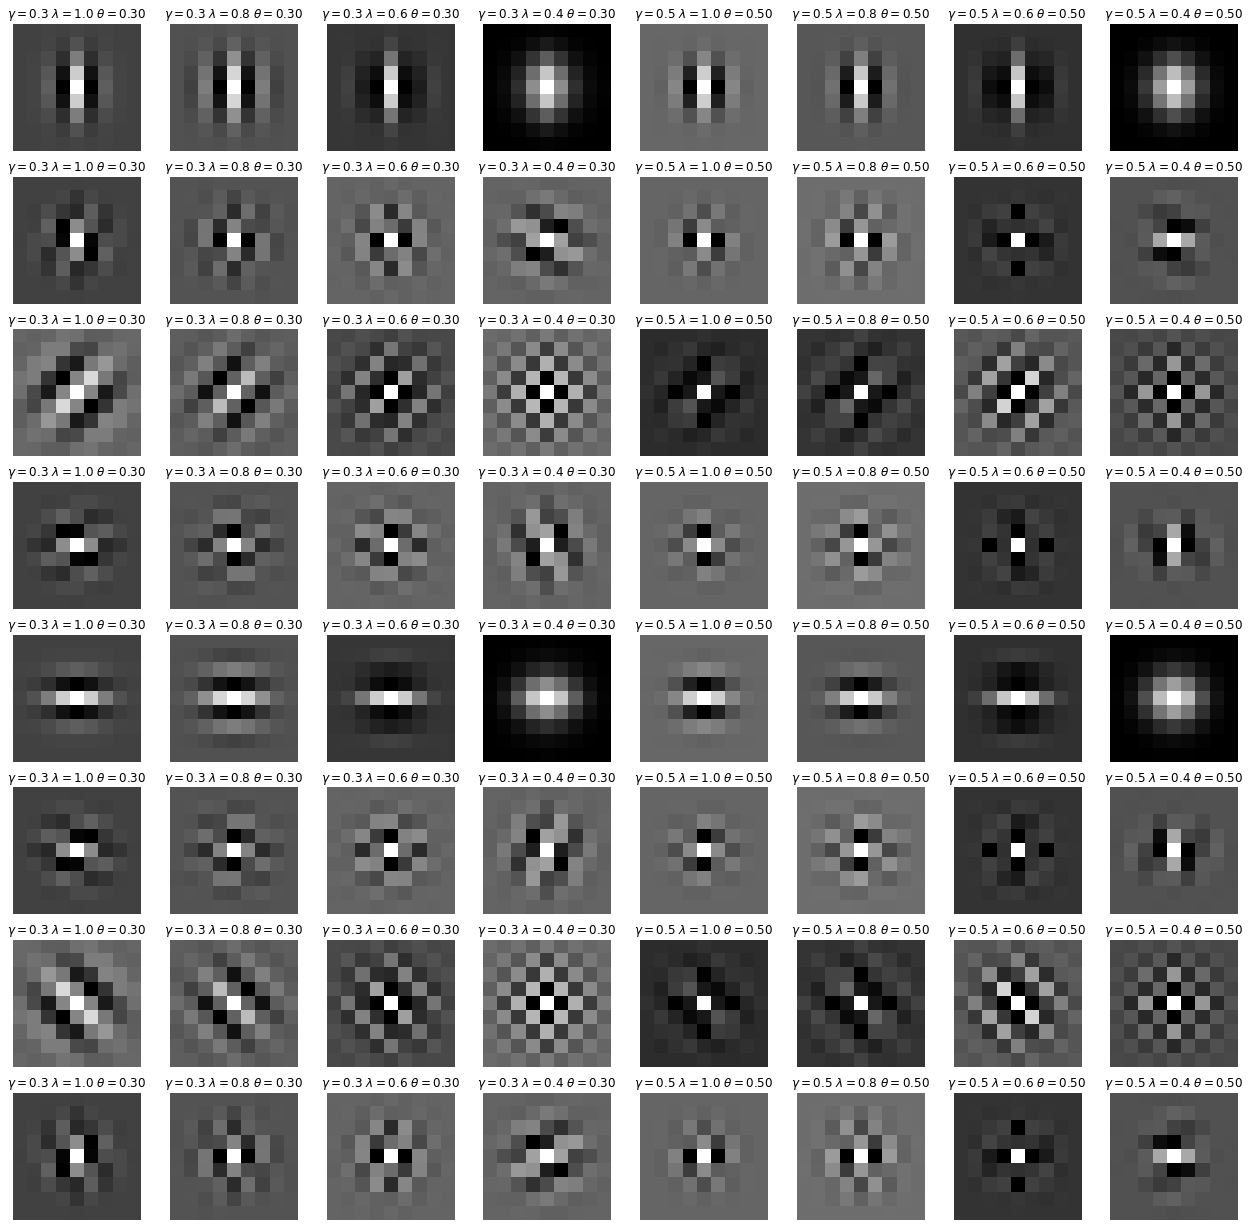

In [2]:
fig = plt.subplots(8, 8, figsize=(22,22))
filterbank = []
cnt = 0
for angle in np.linspace(0.0, 3.14159, 8, endpoint=False):
  for freq in [0.3, 0.5]:
    # cnt = cnt + 1
    # gk = gabor_kernel(frequency=freq)
    # plt.subplot(3, 5, cnt)
    # plt.imshow(gk.real, cmap='gray')
    # print(gk.real.shape)
    # # plt.colorbar()
    # plt.axis('off')
    # plt.title("$\\gamma=${0:0.1f}".format(freq))
    for band in [1.0, 0.8, 0.6, 0.4]:
      print(freq, band, angle)
      cnt = cnt + 1
      gk = gabor_kernel(frequency=freq, bandwidth=band, theta=angle)
      plt.subplot(8, 8, cnt)
      gf = resize(gk.real,(9,9),anti_aliasing=False)
      gf = gf - np.min(gf)
      gf = gf/np.max(gf)
      gf = gf * 0.6
      gf = gf - 0.3
      filterbank.append(gf)
      plt.imshow(gf, cmap='gray')
      print(gk.real.shape)
      # plt.colorbar()
      plt.axis('off')
      plt.title("$\\gamma=${0:0.1f} $\\lambda=${1:0.1f} $\\theta=${0:0.2f}".format(freq,band,angle))
plt.show()
# for angle in np.linspace(0.0, 3.14159, 8, endpoint=False):
#   print(angle)
#   cnt = cnt + 1
#   gk = gabor_kernel(frequency=0.1, theta=angle)
#   plt.subplot(8, 9, cnt)
#   plt.imshow(gk.real, cmap='gray')
#   print(gk.real.shape)
#   # plt.colorbar()
#   plt.axis('off')
#   plt.title("$\\theta=${0:0.2f}".format(angle))

# plt.savefig('gabor_filters.png', bbox_inches='tight', dpi=300)

In [11]:
np.min(gf)

-0.3

In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [13]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (9, 9), strides=(2, 2), activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 64)        15616     
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)        

In [14]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 21s 42ms/step - loss: 0.2747 - accuracy: 0.3567 - val_loss: 0.2584 - val_accuracy: 0.3824
Epoch 2/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.2272 - accuracy: 0.4815 - val_loss: 0.2486 - val_accuracy: 0.4291
Epoch 3/1000
500/500 [==============================] - 24s 48ms/step - loss: 0.2106 - accuracy: 0.5243 - val_loss: 0.2064 - val_accuracy: 0.5325
Epoch 4/1000
500/500 [==============================] - 25s 50ms/step - loss: 0.2002 - accuracy: 0.5543 - val_loss: 0.2176 - val_accuracy: 0.4931
Epoch 5/1000
500/500 [==============================] - 24s 49ms/step - loss: 0.1915 - accuracy: 0.5757 - val_loss: 0.1965 - val_accuracy: 0.5566
Epoch 6/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.1859 - accuracy: 0.5912 - val_loss: 0.2325 - val_accuracy: 0.5018
Epoch 7/1000
500/500 [==============================] - 24s 49ms/step - loss: 0.1793 - accuracy: 0.6086 - val_loss: 0.2140 -

500/500 [==============================] - 23s 46ms/step - loss: 0.0914 - accuracy: 0.8187 - val_loss: 0.1175 - val_accuracy: 0.7602
Epoch 108/1000
500/500 [==============================] - 26s 51ms/step - loss: 0.0907 - accuracy: 0.8202 - val_loss: 0.1176 - val_accuracy: 0.7609
Epoch 109/1000
500/500 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.8196
Epoch 00109: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
500/500 [==============================] - 23s 45ms/step - loss: 0.0906 - accuracy: 0.8196 - val_loss: 0.1176 - val_accuracy: 0.7614
Epoch 110/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.0906 - accuracy: 0.8193 - val_loss: 0.1166 - val_accuracy: 0.7627
Epoch 111/1000
500/500 [==============================] - 21s 41ms/step - loss: 0.0903 - accuracy: 0.8203 - val_loss: 0.1167 - val_accuracy: 0.7644
Epoch 112/1000
500/500 [==============================] - 20s 40ms/step - loss: 0.0894 - accuracy: 0.8229 - va

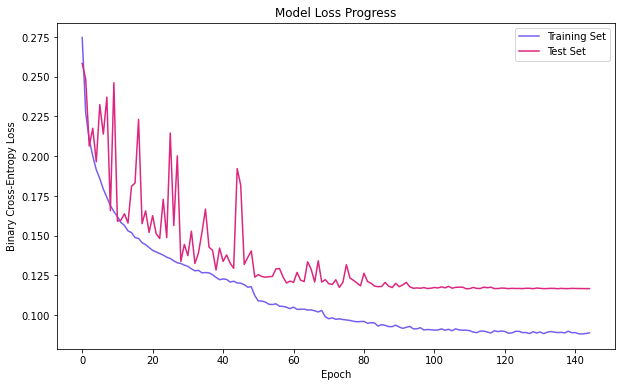

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.12.cnn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


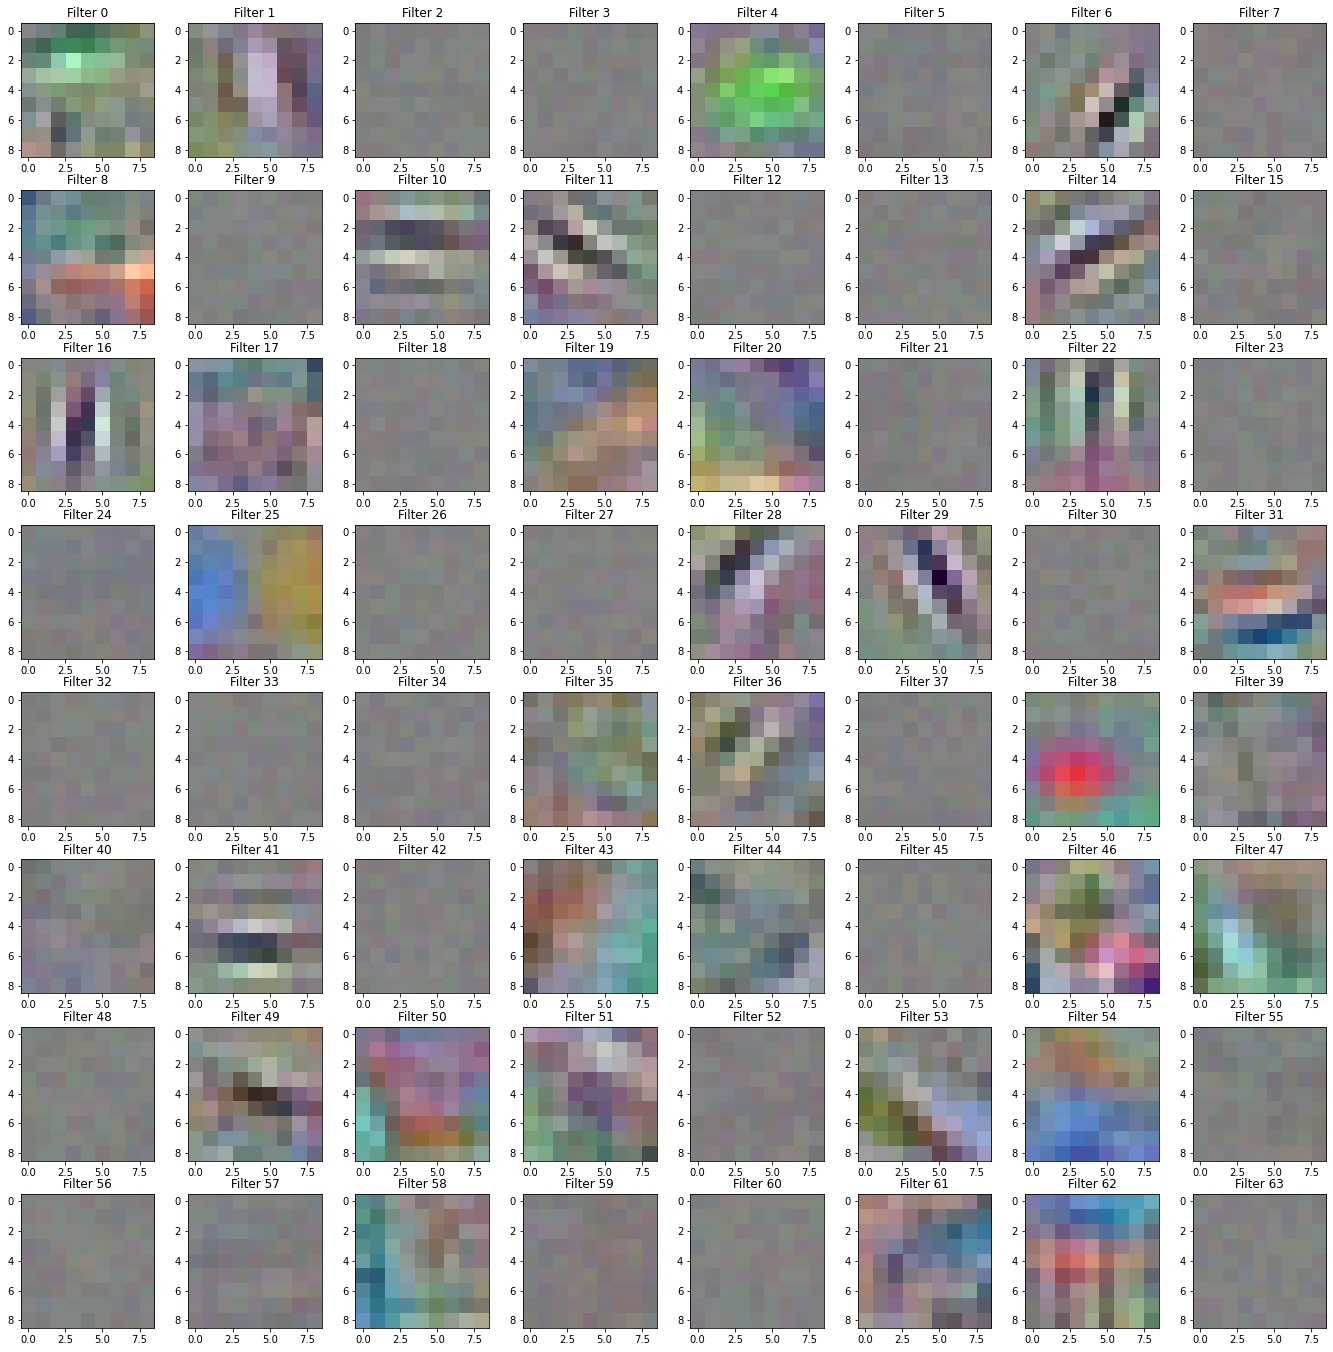

In [16]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("ch.12.cnn.full.filters.png", bbox_inches='tight', dpi=350)


-0.6532136 0.6167374


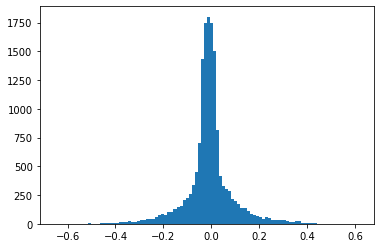

In [17]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))

In [18]:
classifier = None

In [35]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (9, 9), strides=(2, 2),activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        15616     
_________________________________________________________________
batch_normalization_15 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 4, 4, 128)         512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 128)       

In [36]:
gabor_filters = np.empty(wshape, dtype='float32')
for k in range(wshape[3]):
  gabor_filters[:,:,0,k] = filterbank[k]
  gabor_filters[:,:,1,k] = filterbank[k]
  gabor_filters[:,:,2,k] = filterbank[k]

In [42]:
wshape

(9, 9, 3, 64)

In [41]:
len(filterbank)

64

In [46]:
np.linspace(0.0, 3.14159, 8, endpoint=False)

array([0.        , 0.39269875, 0.7853975 , 1.17809625, 1.570795  ,
       1.96349375, 2.3561925 , 2.74889125])

In [37]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
classifier.get_layer(name=cnnl1).set_weights([gabor_filters, np.empty((wshape[3],), dtype='float32')])   #set the filters

In [38]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 26s 51ms/step - loss: 0.3468 - accuracy: 0.1000 - val_loss: 0.4442 - val_accuracy: 0.0999
Epoch 2/1000
500/500 [==============================] - 26s 52ms/step - loss: 0.3305 - accuracy: 0.1025 - val_loss: 0.3798 - val_accuracy: 0.1000
Epoch 3/1000
500/500 [==============================] - 26s 52ms/step - loss: 0.3287 - accuracy: 0.0987 - val_loss: 0.6087 - val_accuracy: 0.1002
Epoch 4/1000
500/500 [==============================] - 24s 48ms/step - loss: 0.3279 - accuracy: 0.0980 - val_loss: 0.3813 - val_accuracy: 0.0994
Epoch 5/1000
500/500 [==============================] - 24s 48ms/step - loss: 0.3273 - accuracy: 0.1000 - val_loss: 0.7128 - val_accuracy: 0.1005
Epoch 6/1000
500/500 [==============================] - 24s 48ms/step - loss: 0.3269 - accuracy: 0.1036 - val_loss: 0.3894 - val_accuracy: 0.1005
Epoch 7/1000
500/500 [==============================] - 25s 49ms/step - loss: 0.3269 - accuracy: 0.0999 - val_loss: 0.4671 -

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.12.cnn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("ch.12.cnn.full.filters.png", bbox_inches='tight', dpi=350)


In [ ]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))